# Statistical Inference: Significance Tests About Hypotheses

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

import statsmodels.stats as stats

import matplotlib.pyplot as plt

%matplotlib inline

## Significance tests about means

### 9.33 Lake pollution

In [2]:
X = np.array([2000, 1000, 3000, 2000])

In [5]:
# mean
print('mean', np.mean(X))

# standard deviation
print('s', np.std(X))

# standard error
print('se', scipy.stats.sem(X))

mean 2000.0
s 707.1067811865476
se 408.248290463863


In [10]:
from statsmodels.stats.weightstats import DescrStatsW

In [13]:
d = DescrStatsW(X)

In [15]:
print(d.mean, d.std, d.std_mean)

2000.0 707.1067811865476 408.24829046386304


In [23]:
# test statistic and p-value
tstat, pval, df = (round(x, 3) for x in d.ttest_mean(1000, alternative='larger'))
print(tstat, pval)

2.449 0.046


In [24]:
# significance level
pval < 0.05

True

### 9.35 Crossover study

In [26]:
data = pd.DataFrame(
    data={
        'F': [310, 385, 400, 310, 410, 370, 410, 320, 330, 250, 380, 340, 220], 
        'S': [270, 370, 310, 260, 380, 300, 390, 290, 365, 210, 350, 260, 90]
    })
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
F,310,385,400,310,410,370,410,320,330,250,380,340,220
S,270,370,310,260,380,300,390,290,365,210,350,260,90


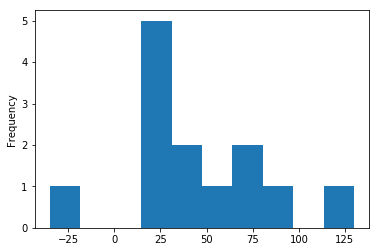

In [27]:
data['difference'] = data['F'] - data['S']

data.difference.plot(kind='hist')

1. Assumptions

Convenience sample. The distribution might be normal, but we are doing two-sided test that is robust when data is slightly skewed.

2. Hypotheses
    - $H_0: \mu = 0$
    - $H_a: \mu \ne 0$

3. Test statistic

In [32]:
d = DescrStatsW(data['difference'])
mu_0 = 0
h_a = 'two-sided'

# test statistic and p-value
tstat, pval, df = (round(x, 3) for x in d.ttest_mean(mu_0, alternative=h_a))
print(tstat)

4.031


4. P-value

In [34]:
print('p-value:', pval)
print('p-value < 0.05:', pval<0.05)

p-value: 0.002
p-value < 0.05: True


5. Conclusion

We reject the null hypothesis. Although, when using a convenience sample we have to be very carefour when interfering for the whole population.